<a href="https://colab.research.google.com/github/IvanUlloa098/simulacion/blob/main/tarea_10/tarea_interrupciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica Interrupciones
## Ivan Ulloa

In [1]:
!pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import simpy
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
AFORO=300
CONTAGIO=0.1 # Porcentaje de poblacion ya contagiada
PROB_CONTAGIO=0.15 # Probabilidad de contagio usando mascarilla
TIEMPO_SIMULACION = 30
UNIVERSO=AFORO*TIEMPO_SIMULACION

In [4]:
class Instituto(object):    
  def __init__(self, environment, aforo):        
    self.env=environment
    self.aforo = simpy.Resource(environment, aforo)   
    self.listcontagios = LISTCONTAGIOS
      
  def asistencia_alumno(self, alumno, id,contagio):
    if(alumno==0):
      distribucion[id]=contagio
    yield self.env.timeout(1)
  
  def generador_contagio(self):
    aux = self.listcontagios[0]
    self.listcontagios = np.delete(self.listcontagios, 0)
    return aux
    
def llegada_establecimineto(env, alumno, id, contagio, instituto):  
  #print(f'El alumno {id} ha llegado al establecimiento')
  with instituto.aforo.request() as aforo:        
      yield aforo
      yield env.process(instituto.asistencia_alumno(alumno,id,contagio))    

def run_simulation(env):
  instituto=Instituto(env, AFORO)
  
  DIA=0

  while True:
    i=0
    for k in range(AFORO):
      aux = instituto.generador_contagio()
      CONT_ACUMULADO.append(aux)
      env.process(llegada_establecimineto(env, distribucion[k],k,aux,instituto))
      i+=1

    if(DIA==(TIEMPO_SIMULACION-1)):
      print(f'Similacion concluida en {DIA+1} dias')
      break
    else:
      DIA+=1

    t=env.now
    #print(CONT_ACUMULADO)
    CONTG[t]=CONT_ACUMULADO.count(1)
    yield env.timeout(1)


In [10]:
CONT_ACUMULADO=[]
CONTG={}

bernoulli = stats.bernoulli(CONTAGIO)
distribucion = bernoulli.rvs(UNIVERSO)

contagios=stats.bernoulli(PROB_CONTAGIO)
LISTCONTAGIOS=contagios.rvs(UNIVERSO)

env=simpy.Environment()
env.process(run_simulation(env))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

Similacion concluida en 30 dias


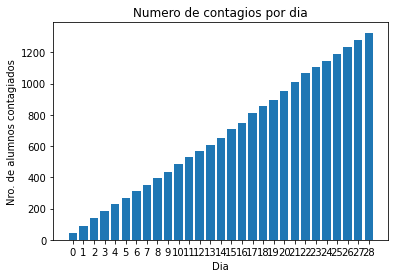

In [11]:
etiqueta = list(CONTG.keys())
valores = list(CONTG.values())

plt.bar(range(len(CONTG)), valores, align="center", tick_label=etiqueta)
plt.title("Numero de contagios por dia")
plt.xlabel("Dia")
plt.ylabel("Nro. de alumnos contagiados")
plt.show()